In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [5]:
# Load the .npy files
X = np.load('/kaggle/input/newdata/X.npy')
y = np.load('/kaggle/input/newdata/y.npy')


In [3]:
# Normalize the data to [0, 1]
X = X.astype('float32') / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)  
print(y_train.shape) 


In [ ]:
print(X_train.shape[0])  
print(y_train.shape[0])  


In [2]:
# Load the .npy files
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')


In [4]:
unique_labels, counts = np.unique(y_train, return_counts=True)

# Print the labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} occurrences")

Label 0: 712 occurrences
Label 1: 1143 occurrences
Label 2: 723 occurrences
Label 3: 823 occurrences
Label 4: 884 occurrences
Label 5: 871 occurrences
Label 6: 806 occurrences


In [6]:
X_train = X_train.astype('float32') / 255.0

In [5]:
X_test = np.load('/kaggle/input/testdata/X_test.npy')
y_test = np.load('/kaggle/input/testdata/y_test.npy')

In [8]:
X_test = X_test.astype('float32') / 255.0

*Splitting into training and testing sets*

In [10]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


*One hot encoding, because the dataset is multiclass*

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

print("One-hot encoded labels:\n", y_train_one_hot)

One-hot encoded labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [30]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 128, 216, 1)


# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 216, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [32]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 113s 741ms/step - accuracy: 0.2293 - loss: 1.8420 - val_accuracy: 0.3588 - val_loss: 1.5973
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 114s 758ms/step - accuracy: 0.3713 - loss: 1.5863 - val_accuracy: 0.5038 - val_loss: 1.4108
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 112s 746ms/step - accuracy: 0.4959 - loss: 1.3749 - val_accuracy: 0.4904 - val_loss: 1.4982
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 112s 744ms/step - accuracy: 0.5647 - loss: 1.2784 - val_accuracy: 0.5708 - val_loss: 1.2498
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 112s 744ms/step - accuracy: 0.5885 - loss: 1.1808 - val_accuracy: 0.5868 - val_loss: 1.2130
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 113s 757ms/step - accuracy: 0.6377 - loss: 1.0920 - val_accuracy: 0.6044 - val_loss: 1.1918
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 111s 742ms/step - accuracy: 0.6435 - loss: 1.0692 - val_accuracy: 0.6085 - val_loss: 1.1360
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 111s 742ms/step - accuracy: 

In [48]:
X_test = np.load('/kaggle/input/datatest/X_test.npy')
y_test = np.load('/kaggle/input/datatest/y_test.npy')
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 128, 216, 1)
y_test_one_hot = to_categorical(y_test, num_classes=7)
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)

# Print the accuracy on the test data
print(f"Accuracy on test data: {test_accuracy:.2%}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.5723 - loss: 1.3670
Accuracy on test data: 50.78%


*Random Forest Implementation*

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')
X_test = np.load('/kaggle/input/testdata/X_test.npy')
y_test = np.load('/kaggle/input/testdata/y_test.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the input data for Random Forest
X_train = X_train.reshape(X_train.shape[0], -1)  # Convert (128, 216) to a single vector
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.56
Test Accuracy: 0.45

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.42      0.47       202
           1       0.48      0.47      0.47       262
           2       0.48      0.41      0.44        98
           3       0.33      0.30      0.31        84
           4       0.39      0.42      0.40       108
           5       0.22      0.42      0.29        76
           6       0.68      0.66      0.67       129

    accuracy                           0.45       959
   macro avg       0.44      0.44      0.44       959
weighted avg       0.47      0.45      0.46       959



In [49]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 128, 216, 1)


# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 216, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Train the model
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 119s 776ms/step - accuracy: 0.2064 - loss: 1.8934 - val_accuracy: 0.3797 - val_loss: 1.6625
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 145s 799ms/step - accuracy: 0.3973 - loss: 1.5420 - val_accuracy: 0.4116 - val_loss: 1.5289
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 117s 779ms/step - accuracy: 0.4841 - loss: 1.3937 - val_accuracy: 0.4837 - val_loss: 1.3583
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 142s 777ms/step - accuracy: 0.5156 - loss: 1.2934 - val_accuracy: 0.4853 - val_loss: 1.3536
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 116s 774ms/step - accuracy: 0.5731 - loss: 1.2081 - val_accuracy: 0.5524 - val_loss: 1.2739
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 117s 778ms/step - accuracy: 0.5858 - loss: 1.1754 - val_accuracy: 0.5775 - val_loss: 1.2261
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 117s 778ms/step - accuracy: 0.5550 - loss: 1.2265 - val_accuracy: 0.5859 - val_loss: 1.2282
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 116s 776ms/step - accuracy: 

In [ ]:
# Train the model
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

In [51]:
X_test = np.load('/kaggle/input/datatest/X_test.npy')
y_test = np.load('/kaggle/input/datatest/y_test.npy')
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 128, 216, 1)
y_test_one_hot = to_categorical(y_test, num_classes=7)
test_loss, test_accuracy = model2.evaluate(X_test, y_test_one_hot)

# Print the accuracy on the test data
print(f"Accuracy on test data: {test_accuracy:.2%}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.5560 - loss: 1.4427
Accuracy on test data: 51.09%


In [7]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 128, 216, 1)


# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=7)
# y_test_one_hot = to_categorical(y_test, num_classes=7)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 216, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes
])
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [8]:
# Train the model
model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 152s 995ms/step - accuracy: 0.2276 - loss: 1.8697 - val_accuracy: 0.3412 - val_loss: 1.6110
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 135s 897ms/step - accuracy: 0.3787 - loss: 1.5802 - val_accuracy: 0.4510 - val_loss: 1.3954
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 135s 903ms/step - accuracy: 0.4814 - loss: 1.4113 - val_accuracy: 0.5189 - val_loss: 1.3160
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 133s 889ms/step - accuracy: 0.5526 - loss: 1.2494 - val_accuracy: 0.5809 - val_loss: 1.1976
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5994 - loss: 1.1699 - val_accuracy: 0.6094 - val_loss: 1.1573
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 135s 898ms/step - accuracy: 0.6201 - loss: 1.1038 - val_accuracy: 0.5926 - val_loss: 1.1548
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 139s 927ms/step - accuracy: 0.6305 - loss: 1.0735 - val_accuracy: 0.5918 - val_loss: 1.1550
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 140s 917ms/step - accuracy: 0.6

In [9]:
X_test = np.load('/kaggle/input/datatest/X_test.npy')
y_test = np.load('/kaggle/input/datatest/y_test.npy')
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 128, 216, 1)
y_test_one_hot = to_categorical(y_test, num_classes=7)
test_loss, test_accuracy = model3.evaluate(X_test, y_test_one_hot)

# Print the accuracy on the test data
print(f"Accuracy on test data: {test_accuracy:.2%}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.5448 - loss: 1.4845
Accuracy on test data: 50.36%


In [10]:
model3.save("CNN_model3.h5")

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step


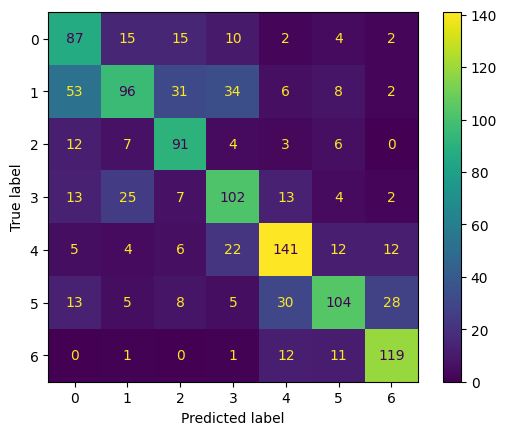

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_val_pred_probs = model3.predict(X_val)

# Convert probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)

# Convert one-hot encoded validation labels back to class labels
y_val_true_classes = np.argmax(y_val, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(7))
disp.plot(cmap='viridis')

In [ ]:
model = load_model('/kaggle/input/your-model-folder/your_model.h5')

RNN Model> 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0

# Flatten the images for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, features)

# Standardize the flattened features for better performance
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='saga', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_val_pred))


NameError: name 'np' is not defined

In [5]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 128, 216, 1)


# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=7)
# y_test_one_hot = to_categorical(y_test, num_classes=7)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 216, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 classes
])
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [6]:
# Train the model
model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 124s 809ms/step - accuracy: 0.1978 - loss: 1.9178 - val_accuracy: 0.2649 - val_loss: 1.8038
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 119s 792ms/step - accuracy: 0.2913 - loss: 1.7179 - val_accuracy: 0.2733 - val_loss: 1.6975
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 142s 795ms/step - accuracy: 0.3112 - loss: 1.6710 - val_accuracy: 0.4023 - val_loss: 1.6065
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 119s 794ms/step - accuracy: 0.3850 - loss: 1.5744 - val_accuracy: 0.4065 - val_loss: 1.5105
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 142s 797ms/step - accuracy: 0.4375 - loss: 1.4864 - val_accuracy: 0.4183 - val_loss: 1.4842
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 122s 817ms/step - accuracy: 0.4516 - loss: 1.4650 - val_accuracy: 0.4795 - val_loss: 1.4121
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 120s 798ms/step - accuracy: 0.4877 - loss: 1.4084 - val_accuracy: 0.4987 - val_loss: 1.3833
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 123s 817ms/step - accuracy: 

In [7]:
X_test = np.load('/kaggle/input/datatest/X_test.npy')
y_test = np.load('/kaggle/input/datatest/y_test.npy')
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 128, 216, 1)
y_test_one_hot = to_categorical(y_test, num_classes=7)
test_loss, test_accuracy = model4.evaluate(X_test, y_test_one_hot)

# Print the accuracy on the test data
print(f"Accuracy on test data: {test_accuracy:.2%}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.5260 - loss: 1.3864
Accuracy on test data: 45.99%


**After Applying a Dynammic Width for the sepctogram**

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load preprocessed data
X_train = np.load('/kaggle/input/trainsetdata/X_train.npy')
y_train = np.load('/kaggle/input/trainsetdata/y_train.npy')

# Normalize the data (if necessary, already in float32 format)
X_train = X_train.astype('float32') / 255.0

# Reshape to add channel dimension
X_train = X_train.reshape(-1, 128, 440, 1)
print(np.unique(y_train))

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=7)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Check number of unique classes
# num_classes = len(np.unique(y_train))  # Ensure correct number of classes (e.g., 7 or 2)

print("Number of classes:", num_classes) 

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional layer with Batch Normalization and MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer with Batch Normalization and MaxPooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional layer with Batch Normalization and MaxPooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Global Average Pooling to handle the variable width of spectrograms
    model.add(layers.GlobalAveragePooling2D())

    # Dense layers for classification
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
                  metrics=['accuracy'])
    
    return model

# Define the input shape (height, width, channels)
input_shape = (X_train.shape[1], X_train.shape[2], 1)  # (128, 440, 1)

# Create the CNN model
model6 = create_cnn_model(input_shape, 7)

# Print model summary to verify architecture
model6.summary()

# Train the model
history = model6.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=10, 
                    batch_size=32)

# Save the model


# Optionally, save the training history
# np.save('history.npy', history.history)

# Optionally, evaluate the model on the validation set after training
val_loss, val_accuracy = model6.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


[0 1 2 3 4 5 6]
Number of classes: 2


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 126, 438, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 63, 219, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 61, 217, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 30, 108, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 106, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 14, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,087 (430.03 KB)

 Trainable params: 110,087 (430.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.1817 - loss: 1.9374 - val_accuracy: 0.2515 - val_loss: 1.8119
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.2259 - loss: 1.8407 - val_accuracy: 0.2506 - val_loss: 1.7656
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.2586 - loss: 1.8056 - val_accuracy: 0.2674 - val_loss: 1.7485
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.2714 - loss: 1.7834 - val_accuracy: 0.3470 - val_loss: 1.6394
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.3103 - loss: 1.6899 - val_accuracy: 0.3386 - val_loss: 1.5830
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.3486 - loss: 1.6429 - val_accuracy: 0.4132 - val_loss: 1.5515
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.3791 - loss: 1.5982 - val_accuracy: 0.4602 - val_loss: 1.5046
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.4034 - loss: 1.5361 - val_accu

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath==model.h6.

In [23]:
model6.save("CNN_model6.h5")

In [25]:
X_test = np.load('/kaggle/input/testsetdata/X_test.npy')
y_test = np.load('/kaggle/input/testsetdata/y_test.npy')
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 128, 440, 1)
y_test_one_hot = to_categorical(y_test, num_classes=7)
test_loss, test_accuracy = model6.evaluate(X_test, y_test_one_hot)

# Print the accuracy on the test data
print(f"Accuracy on test data: {test_accuracy:.2%}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 502ms/step - accuracy: 0.4967 - loss: 1.5115
Accuracy on test data: 44.32%


In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the data
X_train = np.load('/kaggle/input/newdata/X.npy')
y_train = np.load('/kaggle/input/newdata/y.npy')
X_test = np.load('/kaggle/input/testdata/X_test.npy')
y_test = np.load('/kaggle/input/testdata/y_test.npy')

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the input data for Random Forest
X_train = X_train.reshape(X_train.shape[0], -1)  # Convert (128, 216) to a single vector
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")

# Evaluate the model on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.56
Test Accuracy: 0.45

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.42      0.47       202
           1       0.48      0.47      0.47       262
           2       0.48      0.41      0.44        98
           3       0.33      0.30      0.31        84
           4       0.39      0.42      0.40       108
           5       0.22      0.42      0.29        76
           6       0.68      0.66      0.67       129

    accuracy                           0.45       959
   macro avg       0.44      0.44      0.44       959
weighted avg       0.47      0.45      0.46       959

